In [49]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM)', os.getcwd())[0]
sys.path.append(root_project)

In [50]:
import pandas as pd
import klib
from src.features.add_features import add_features
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
from src.utils.help_func import rename_indicators

sns.set()

In [90]:
seed = 42
df_raw = pd.read_csv("../../data/processed/simulation_results_REV4.csv")
print(df_raw.shape)
df_raw.head()

(70000, 18)


i_country         R0        Tc         Tr     omega     ind_inf_1  \
0       DJI  12.187967  1.733278  21.125133  0.197944  2.160967e+03   
1       KAZ   8.802094  0.776828   6.837709  0.886055  2.402667e+02   
2       LTU  12.787478  0.195316   2.497605  0.113979  2.503724e+08   
3       DMA  16.545501  1.022406  16.916222  0.104739  1.404241e+05   
4       CPV  10.116505  2.062013  20.860369  0.129716  1.649600e+03   

      ind_inf_2  ind_inf_sumgrad    ind_inf_p  ind_mort_1   ind_mort_2  \
0   4757.961648     4.063839e+04     0.067606    0.353545     0.487118   
1    907.398367     1.574797e+03     0.000394    0.687708     2.763238   
2   7666.911039     1.304820e+06  2692.626822    0.221513  1232.088915   
3  50184.583240     1.678547e+06    58.666486    0.378172     0.890632   
4   2644.412518     3.383422e+04     0.091010    0.278977     0.358051   

   ind_mort_3  ind_mort_sumgrad  n_closed  react_time  total_infected  \
0    3.178464            6190.5        19          20    3.023155e+09   
1    4.812301            1111.5        11           8    1.828206e+09   
2    0.284607          305603.0        13          15    7.511292e+09   
3    1.590765          180539.5        13          10    4.906761e+09   
4    2.099191            3457.5         8           5    5.049934e+09   

   total_deceased  total_recovered  
0    2.439964e+09     5.834951e+08  
1    1.569210e+09     2.590006e+08  
2    1.664463e+09     5.846913e+09  
3    3.136703e+09     1.770351e+09  
4    3.687545e+09     1.362756e+09

In [51]:
df_raw = df_raw.sample(15000, random_state=seed)

i_country         R0        Tc         Tr     omega  ind_inf_1  \
46730       NIC   2.726164  2.880362   7.852337  0.333682   0.000000   
48393       TTO  15.615708  1.581239  24.692166  0.508220   5.233333   
41416       SUR  13.349681  1.923908  25.683558  0.438960   2.000000   
34506       VEN  12.878925  1.575816  20.294810  0.665217   0.000000   
43725       TKM   6.054086  2.731820  16.538675  0.678012   0.000000   

       ind_inf_2  ind_inf_sumgrad  ind_inf_p  ind_mort_1  ind_mort_2  \
46730   0.000000         0.000000   0.000000    0.000000    0.000000   
48393  10.139389        23.526981   0.000113    0.783439    4.970197   
41416   2.419256         6.085120   0.000104    0.850000    8.045612   
34506   0.000000         0.000000   0.000000    0.000000    0.000000   
43725   0.000000         0.000000   0.000000    0.000000    0.000000   

       ind_mort_3  ind_mort_sumgrad  n_closed  react_time  total_infected  \
46730    0.000000               0.0        16          13             1.0   
48393   10.266054              10.5        15          14        359605.0   
41416    8.642644               2.0        18          13     156036370.0   
34506    0.000000               0.0        19          15             1.0   
43725    0.000000               0.0         7           1             1.0   

       total_deceased  total_recovered  
46730             0.0              0.0  
48393        333040.0          26437.0  
41416     142061448.0       12594398.0  
34506             0.0              0.0  
43725             0.0              0.0

In [52]:
df_raw.describe()

R0            Tc            Tr         omega     ind_inf_1  \
count  15000.000000  15000.000000  15000.000000  15000.000000  1.500000e+04   
mean      10.005438      2.203101     16.089962      0.422694  1.811476e+07   
std        4.607795      2.005523      8.073922      0.278815  5.600074e+07   
min        2.000661      0.117051      2.000924      0.010003  0.000000e+00   
25%        6.052015      0.916519      9.171369      0.177177  0.000000e+00   
50%       10.047033      1.619954     16.055228      0.384941  1.056333e+02   
75%       13.983851      2.707346     23.095534      0.644454  2.425950e+05   
max       17.999798     14.897849     29.999704      0.999971  2.504136e+08   

          ind_inf_2  ind_inf_sumgrad      ind_inf_p    ind_mort_1  \
count  1.500000e+04     1.500000e+04   15000.000000  15000.000000   
mean   2.304074e+06     8.646066e+07    1585.024627      0.328971   
std    9.149779e+06     3.377916e+08   15708.562291      0.434043   
min   -1.289384e+06    -3.869362e+08       0.000000      0.000000   
25%    0.000000e+00     0.000000e+00       0.000000      0.000000   
50%    1.489493e+02     8.332483e+02       0.000880      0.267378   
75%    9.869977e+04     1.767434e+06       1.010601      0.545215   
max    1.891553e+08     4.293301e+09  594863.862730     12.000000   

         ind_mort_2    ind_mort_3  ind_mort_sumgrad      n_closed  \
count  1.500000e+04  15000.000000      1.500000e+04  15000.000000   
mean  -3.275959e+04      2.182554      1.962729e+07      9.540133   
std    1.903908e+06      3.350782      8.420114e+07      5.816824   
min   -9.967434e+07      0.000000     -1.944988e+08      0.000000   
25%    0.000000e+00      0.000000      0.000000e+00      4.000000   
50%    3.568370e-01      1.050328      1.762500e+02     10.000000   
75%    1.647725e+00      3.200287      2.785242e+05     15.000000   
max    5.832809e+07    122.224452      1.699396e+09     19.000000   

         react_time  total_infected  total_deceased  total_recovered  
count  15000.000000    1.500000e+04    1.500000e+04     1.500000e+04  
mean      10.560600    2.729939e+09    1.711824e+09     1.022832e+09  
std        5.767924    2.706462e+09    1.752595e+09     1.424710e+09  
min        1.000000    1.000000e+00    0.000000e+00     0.000000e+00  
25%        6.000000    1.000000e+00    0.000000e+00     0.000000e+00  
50%       11.000000    2.479309e+09    1.436854e+09     3.522485e+08  
75%       16.000000    5.126757e+09    3.210436e+09     1.588757e+09  
max       20.000000    7.525413e+09    6.540408e+09     7.304726e+09

In [53]:
df_raw.shape

(15000, 18)

In [54]:
df = df_raw.copy()

In [55]:
df = add_features(df)
df = rename_indicators(df)

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
df.isna().sum()

i_country                   0
R0                          0
Tc                          0
Tr                          0
omega                       0
ind_inf_1                   0
ind_inf_2                   0
ind_inf_sumgrad             0
ind_inf_p                   0
ind_mort_1                  0
ind_mort_2                  0
ind_mort_3                  0
ind_mort_sumgrad            0
n_closed                    0
react_time                  0
total_infected              0
total_deceased              0
total_recovered             0
betweenness                 0
degree                      0
closeness                   0
country_pop                 0
country_departures          0
exposed_pop                 0
total_deceased_log          0
ind_1.3                     0
ind_1.4                   305
ind_1.1                   333
ind_1.2                     0
ind_2.2                     0
ind_2.3                   304
ind_2.4                     0
ind_2.1                   328
betweennes

In [57]:
df.dtypes

i_country                  object
R0                        float64
Tc                        float64
Tr                        float64
omega                     float64
ind_inf_1                 float64
ind_inf_2                 float64
ind_inf_sumgrad           float64
ind_inf_p                 float64
ind_mort_1                float64
ind_mort_2                float64
ind_mort_3                float64
ind_mort_sumgrad          float64
n_closed                    int64
react_time                  int64
total_infected            float64
total_deceased            float64
total_recovered           float64
betweenness               float64
degree                    float64
closeness                 float64
country_pop               float64
country_departures          int64
exposed_pop               float64
total_deceased_log        float64
ind_1.3                   float64
ind_1.4                   float64
ind_1.1                   float64
ind_1.2                   float64
ind_2.2       

In [58]:
df = df.loc[df['total_deceased'] > 1 ]
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(10099, 39)
(9624, 39)


In [59]:
df.describe()

R0           Tc           Tr        omega     ind_inf_1  \
count  9624.000000  9624.000000  9624.000000  9624.000000  9.624000e+03   
mean     11.394409     1.448197    14.113203     0.314262  2.379904e+07   
std       4.174955     1.152535     7.782064     0.242073  6.169576e+07   
min       2.005978     0.117051     2.005944     0.010003  1.000000e+00   
25%       8.178226     0.703765     7.448674     0.116758  1.171917e+02   
50%      11.727666     1.181851    13.071456     0.254586  2.150708e+04   
75%      14.979868     1.817212    20.238359     0.463067  2.209446e+06   
max      17.999798    12.588243    29.996405     0.999668  2.504136e+08   

          ind_inf_2  ind_inf_sumgrad     ind_inf_p   ind_mort_1    ind_mort_2  \
count  9.624000e+03     9.624000e+03  9.624000e+03  9624.000000  9.624000e+03   
mean   3.562945e+06     1.348191e+08  2.200232e+03     0.443161  7.777222e+02   
std    1.120545e+07     4.138359e+08  1.834818e+04     0.234897  2.159253e+04   
min    3.546432e-02     5.016491e-02  2.154043e-08     0.012744  9.150958e-03   
25%    1.977508e+02     1.339750e+03  8.025675e-04     0.251404  3.773938e-01   
50%    1.893278e+04     2.688247e+05  2.399987e-01     0.440864  1.017423e+00   
75%    7.443168e+05     2.031856e+07  1.213033e+01     0.617742  2.924204e+00   
max    1.891553e+08     4.293301e+09  5.948639e+05     1.635996  1.812573e+06   

       ...      ind_2.2      ind_2.3      ind_2.4      ind_2.1  \
count  ...  9624.000000  9624.000000  9624.000000  9624.000000   
mean   ...    -1.016806     0.206706     0.657629     9.317528   
std    ...     0.729620     1.922710     1.113300     9.250596   
min    ...    -4.362710    -4.693897   -11.773872   -36.043653   
25%    ...    -1.380692    -0.974466     0.013730     5.564520   
50%    ...    -0.819018     0.017273     0.826797    10.577801   
75%    ...    -0.481685     1.073022     1.492067    14.878074   
max    ...     0.492252    14.410258     2.757726    20.968931   

       betweenness_log   degree_log  country_pop_log  country_departures_log  \
count      9624.000000  9624.000000      9624.000000             9624.000000   
mean        -10.109879    -2.103643        15.334945                8.327097   
std           8.921845     1.001492         2.360688                1.908763   
min         -36.043653    -4.709530         9.362718                1.791759   
25%          -9.822869    -2.763620        13.943192                7.349874   
50%          -7.530978    -2.106841        15.755125                8.321908   
75%          -5.702785    -1.377326        17.042999                9.673965   
max          -1.689014    -0.004515        21.054532               12.924383   

       exposed_pop_log  affected_population  
count      9624.000000         9.624000e+03  
mean         20.374278         3.424685e-01  
std           1.632547         2.013698e-01  
min          12.399033         8.894011e-09  
25%          19.777733         1.986834e-01  
50%          20.403657         3.525723e-01  
75%          21.572351         4.902595e-01  
max          22.600310         8.682159e-01  

[8 rows x 38 columns]

In [60]:
df['total_deceased'].describe()

count    9.624000e+03
mean     2.579870e+09
std      1.516950e+09
min      6.700000e+01
25%      1.496714e+09
50%      2.655983e+09
75%      3.693203e+09
max      6.540408e+09
Name: total_deceased, dtype: float64

In [61]:
df['affected_population'].describe()

count    9.624000e+03
mean     3.424685e-01
std      2.013698e-01
min      8.894011e-09
25%      1.986834e-01
50%      3.525723e-01
75%      4.902595e-01
max      8.682159e-01
Name: affected_population, dtype: float64

In [62]:
profile = ProfileReport(df, title='Pandas Profiling Report', minimal=True)
profile.to_notebook_iframe()

In [63]:
klib.missingval_plot(df)

No missing values found in the dataset.


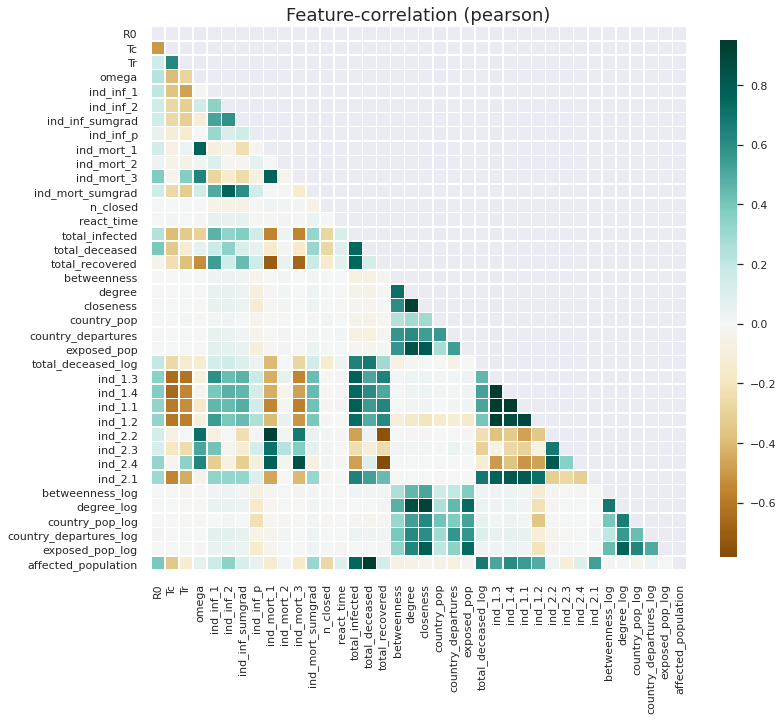

In [64]:
klib.corr_plot(df, annot=False);

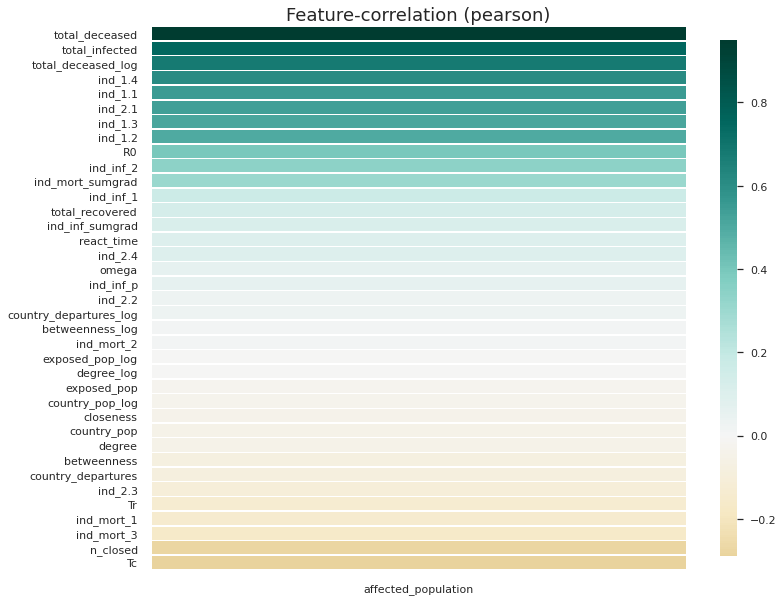

In [65]:
klib.corr_plot(df, target='affected_population', annot=False);

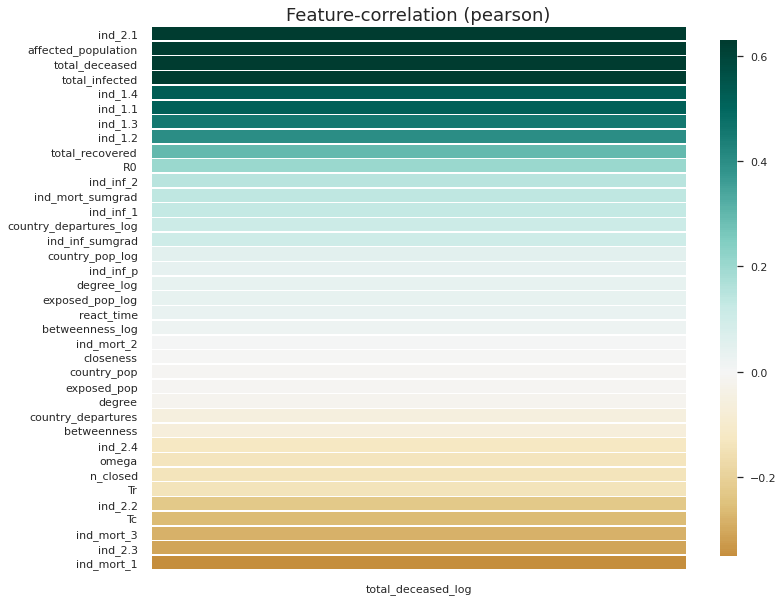

In [66]:
klib.corr_plot(df, target='total_deceased_log', annot=False);

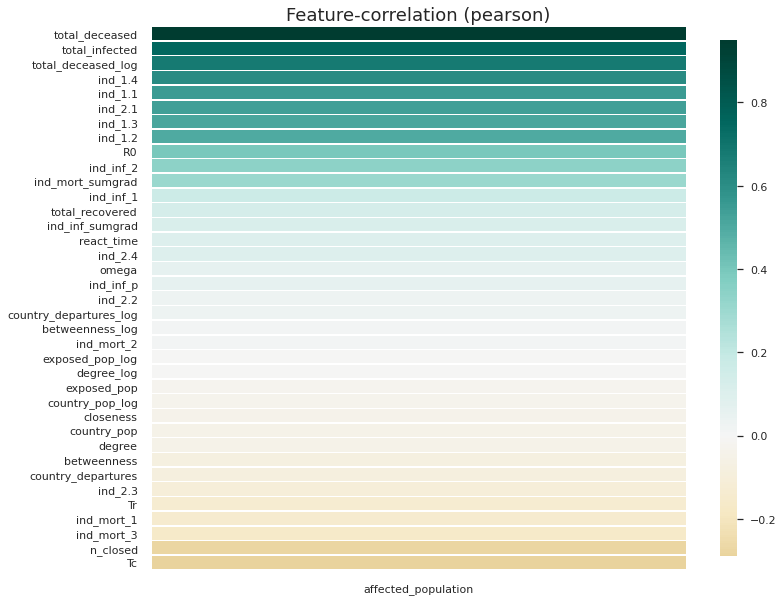

In [67]:
klib.corr_plot(df, target='affected_population', annot=False);

<AxesSubplot:xlabel='total_deceased', ylabel='Density'>

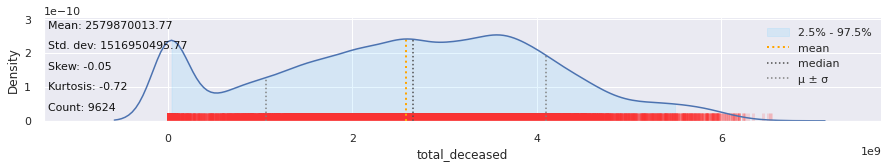

In [68]:
klib.dist_plot(df['total_deceased'])

<AxesSubplot:xlabel='affected_population', ylabel='Density'>

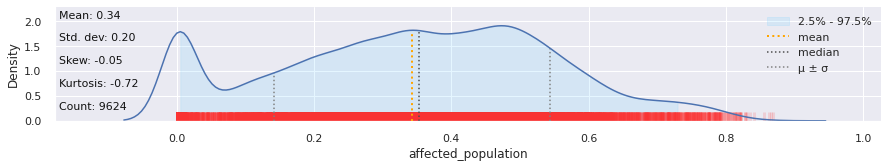

In [69]:
klib.dist_plot(df['affected_population'])

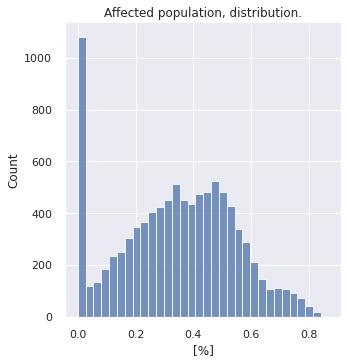

In [70]:
ax = sns.displot(df['affected_population'], height=5)
plt.title('Affected population, distribution.', fontsize=12)
plt.xlabel('[%]');

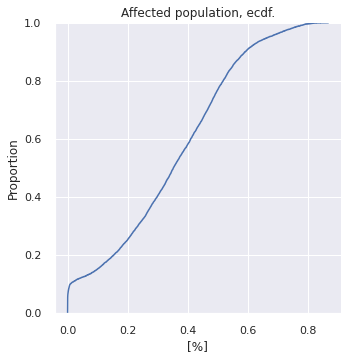

In [71]:
sns.displot(df['affected_population'], kind='ecdf', height=5)
plt.title('Affected population, ecdf.', fontsize=12)
plt.xlabel('[%]');

In [72]:
def scatter_subplots(df, target, n_feat, figsize=(15, 20)):
    features = df.drop(target, axis=1).select_dtypes(exclude=['object']).columns
    rows = int(np.ceil(n_feat/2))
    fig, ax = plt.subplots(rows,2, figsize=figsize)
    fig.subplots_adjust(hspace = .5, wspace=.1)
    ax = ax.ravel()
    for i, feat in zip(range(len(ax)), features):
        ax[i].scatter(df[feat], df[target])
        ax[i].set(title=f"{target} vs {feat}")
    plt.tight_layout()

In [73]:
df_scatter = df.sample(1000)

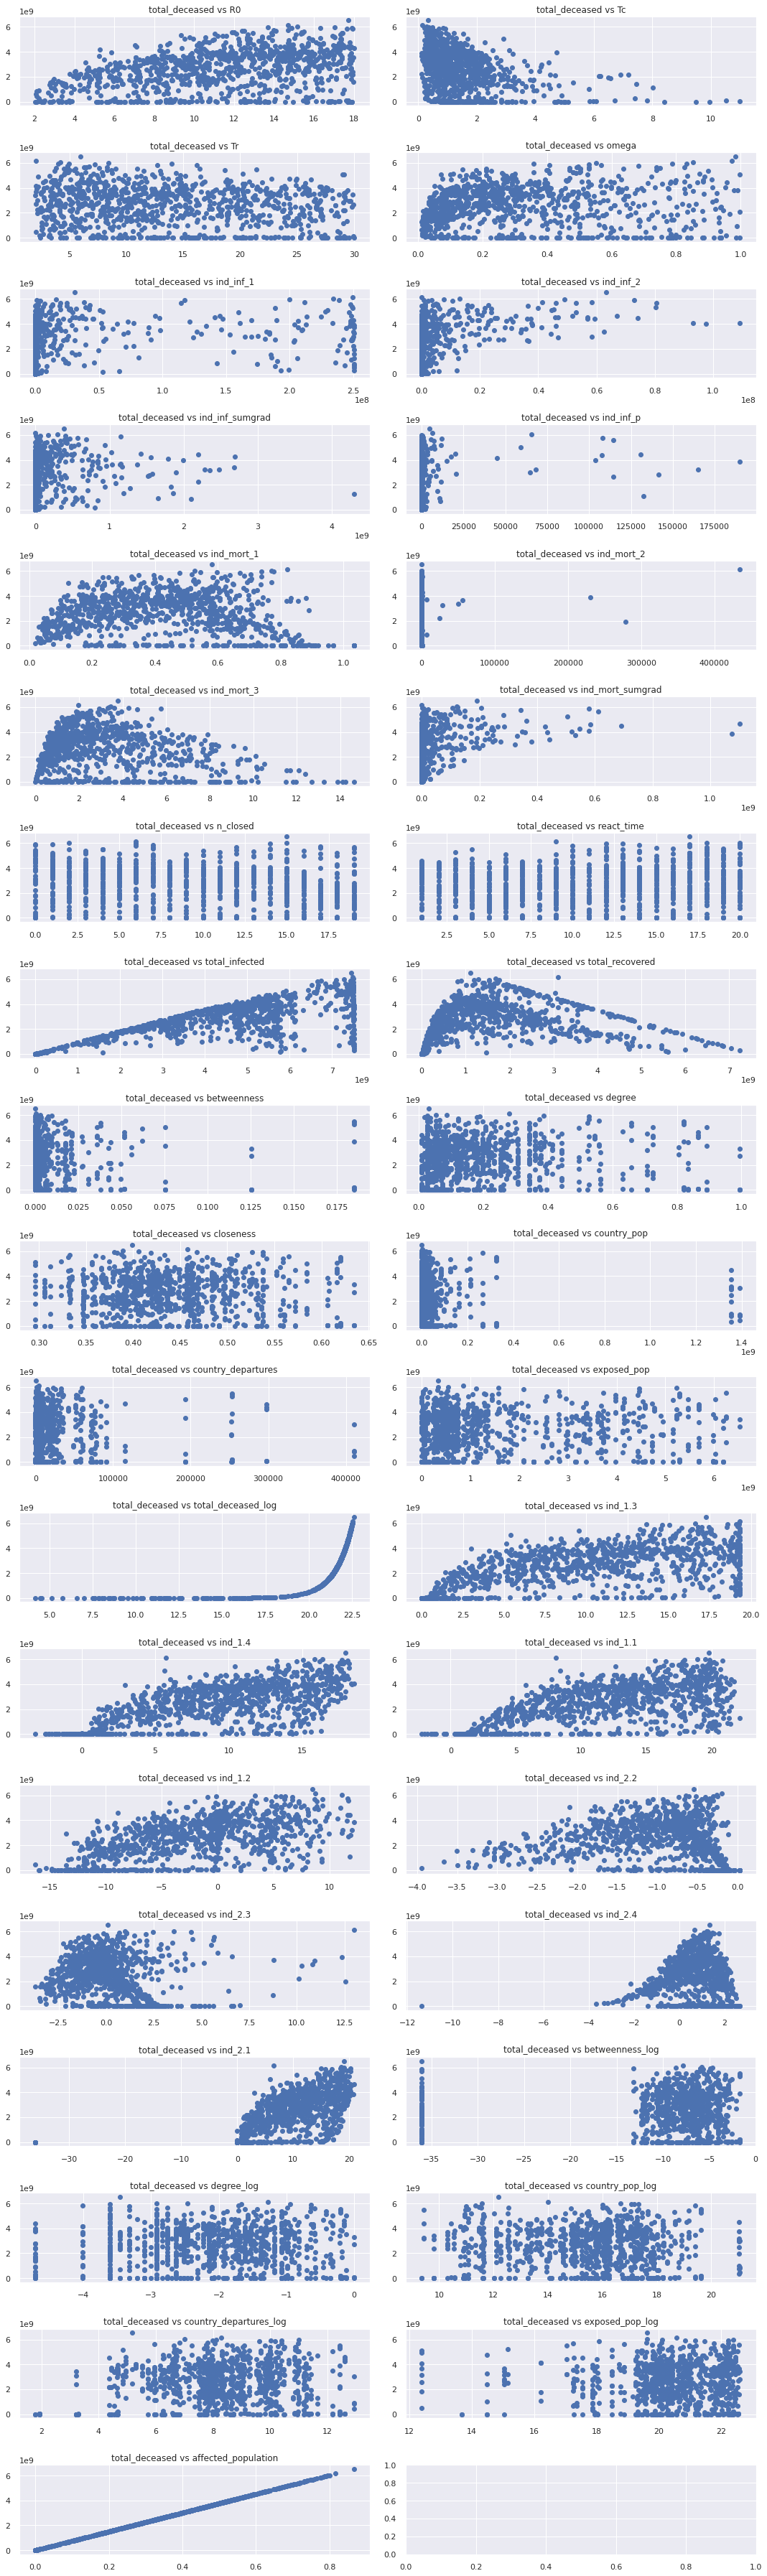

In [74]:
scatter_subplots(df_scatter, 'total_deceased', df_scatter.shape[1]-1, figsize=(15,50))

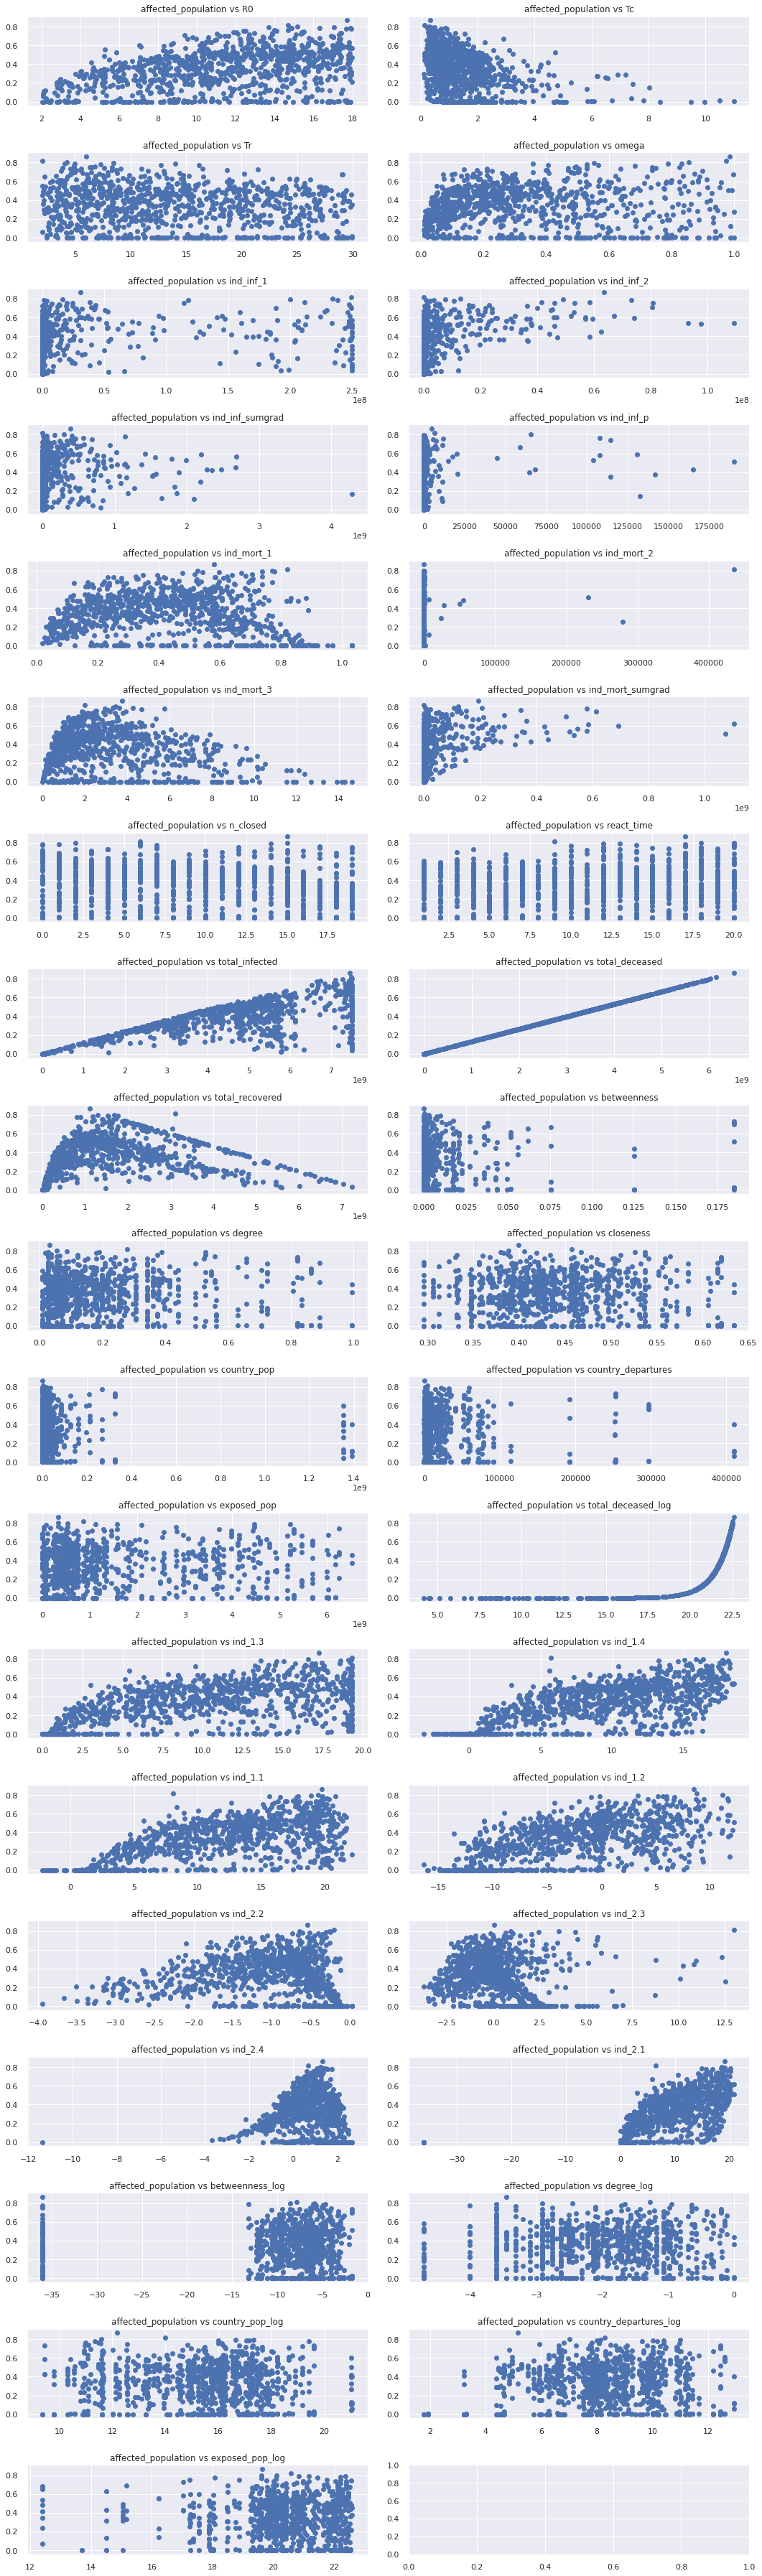

In [75]:
scatter_subplots(df_scatter, 'affected_population', df_scatter.shape[1]-1, figsize=(15,50))

In [76]:
features = [
    'ind_1.1',
    'ind_1.2',
    'ind_1.3',
    'ind_1.4',
    'ind_2.1',
    'ind_2.2',
    'ind_2.3',
    'ind_2.4',
    'n_closed',
    'react_time',
    'betweenness_log',
    'degree_log',
    'closeness',
    'country_pop_log',
    'country_departures_log',
    'exposed_pop_log',
    'affected_population'
    ]

df = df[features]
df.head()

ind_1.1   ind_1.2   ind_1.3    ind_1.4    ind_2.1   ind_2.2  \
48393   3.158148 -9.088466  1.655048   2.316428   2.351375 -0.244061   
41416   1.805846 -9.169503  0.693147   0.883460   0.693147 -0.162519   
24656  10.979096 -6.045470  8.352413   9.572624   9.948628 -0.634691   
22411  12.998546  1.544631  9.723803   8.968487   9.553717 -2.093050   
936    12.068965 -8.469177  9.184157  10.229026  10.572662 -0.906085   

        ind_2.3   ind_2.4  n_closed  react_time  betweenness_log  degree_log  \
48393  1.603460  2.328843        15          14        -5.547479   -2.106841   
41416  2.085127  2.156709        18          13        -8.140420   -2.917771   
24656 -0.050146  1.791781         4           9        -9.577623   -2.144581   
22411 -2.184036 -0.079092         2           7        -5.853222   -2.917771   
936   -0.595658  1.349568         7          19        -3.484589   -0.574364   

       closeness  country_pop_log  country_departures_log  exposed_pop_log  \
48393   0.441352        14.144712                6.616065        19.965769   
41416   0.385417        13.263847                6.700731        19.249124   
24656   0.393617        17.799080                9.513994        21.921267   
22411   0.388792        11.580369                7.012115        19.616169   
936     0.560606        21.054532               12.924383        22.212935   

       affected_population  
48393             0.000044  
41416             0.018858  
24656             0.473662  
22411             0.440854  
936               0.131193

In [77]:
profile = ProfileReport(df, title='Pandas Profiling Report', minimal=True)
profile.to_notebook_iframe()

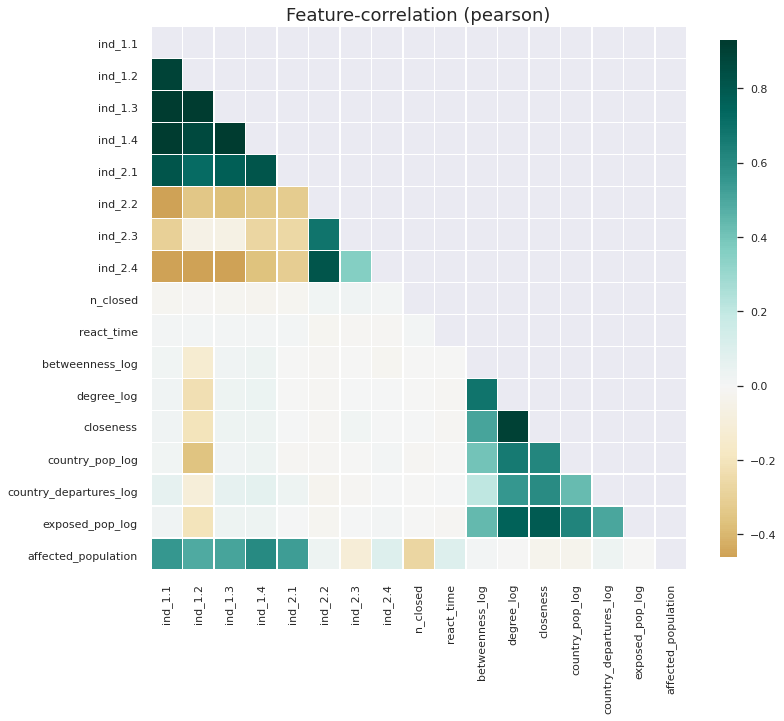

In [78]:
klib.corr_plot(df, annot=False);

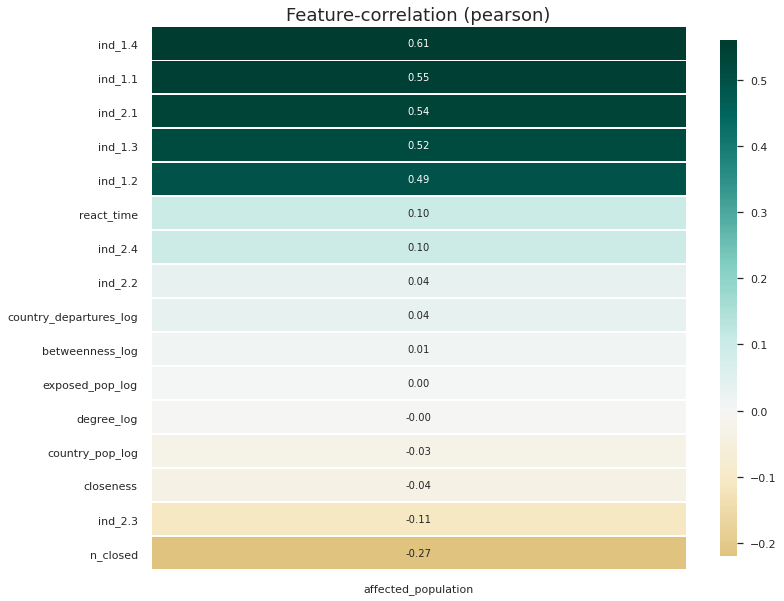

In [79]:
klib.corr_plot(df, target='affected_population', annot=True);

In [80]:
df['ind_1.1'].describe()

count    9624.000000
mean       11.952383
std         5.872587
min        -2.992440
25%         7.200238
50%        12.501815
75%        16.827045
max        22.180322
Name: ind_1.1, dtype: float64

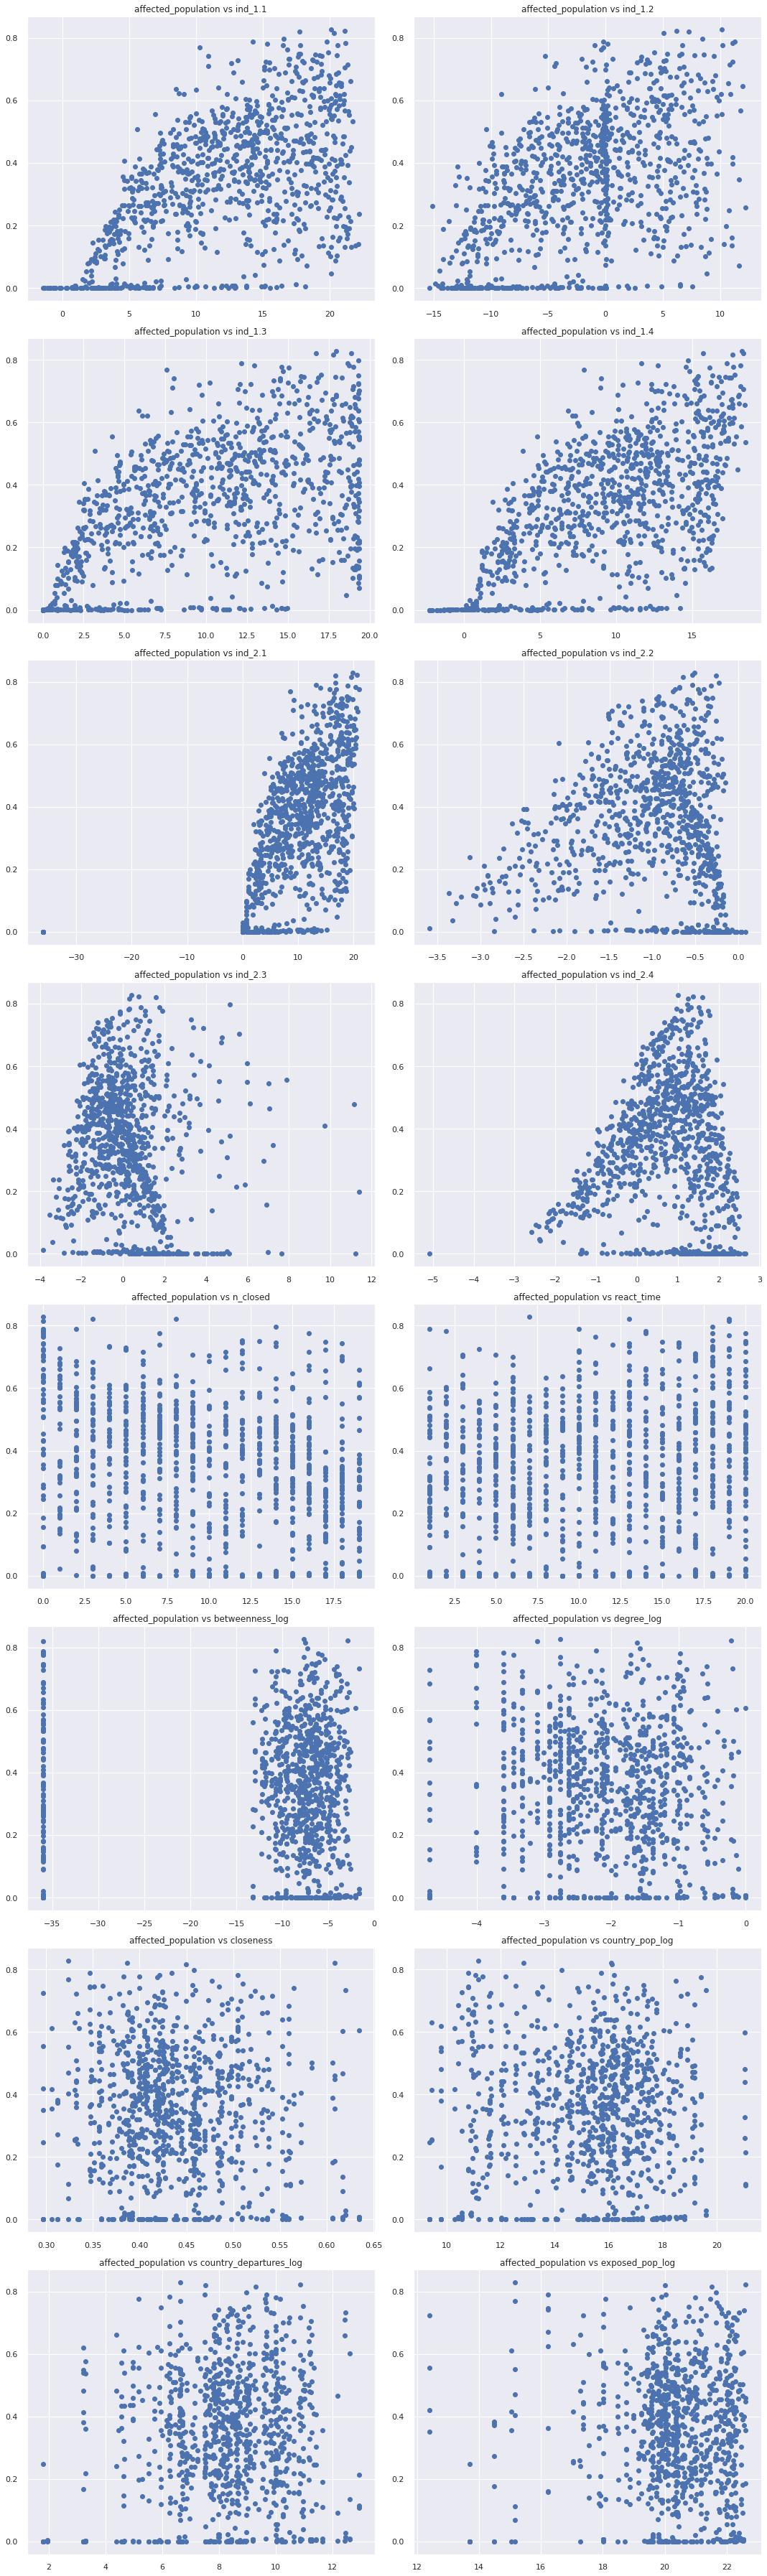

In [81]:
scatter_subplots(df.sample(1000), 'affected_population', df.shape[1]-1, figsize=(15,50))

/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ind_1.4', ylabel='ind_1.1'>

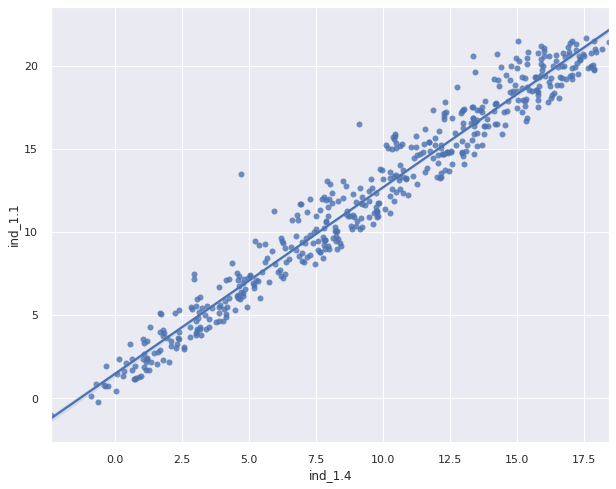

In [82]:
foo = df.sample(500)
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.regplot(foo['ind_1.4'], foo['ind_1.1'],  )

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [85]:
df_vif = calculate_vif_(df)
df_vif['affected_population'] = df['affected_population']

dropping 'country_pop_log' at index: 13
dropping 'ind_1.1' at index: 0
dropping 'ind_1.3' at index: 1
dropping 'exposed_pop_log' at index: 12
dropping 'closeness' at index: 10
dropping 'ind_1.4' at index: 1
dropping 'country_departures_log' at index: 9
dropping 'ind_2.2' at index: 2
dropping 'degree_log' at index: 7
dropping 'affected_population' at index: 7
Remaining variables:
Index(['ind_1.2', 'ind_2.1', 'ind_2.3', 'ind_2.4', 'n_closed', 'react_time',
       'betweenness_log'],
      dtype='object')


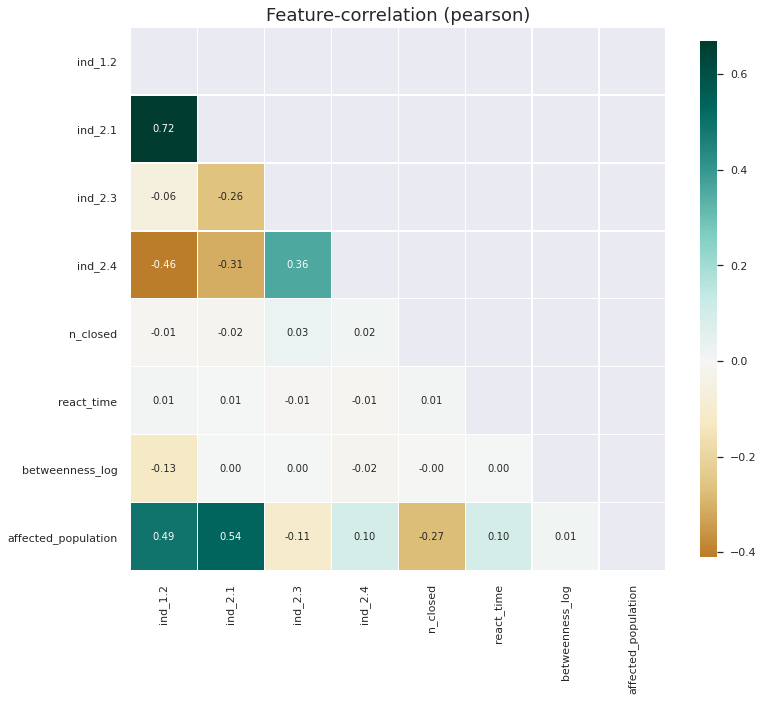

In [89]:
klib.corr_plot(df_vif, annot=True);

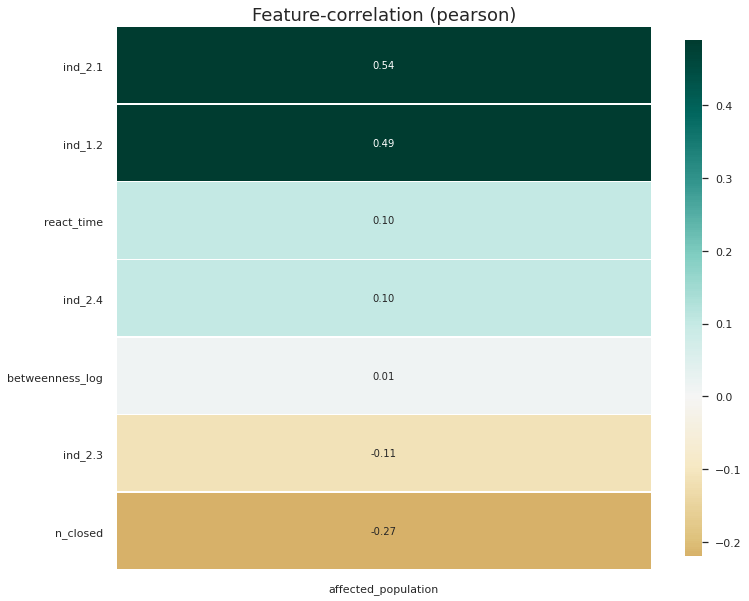

In [88]:
klib.corr_plot(df_vif, target='affected_population', annot=True);